## Reviewing NK and Layered


In [1]:
from Landscapes import *
import numpy as np
from matplotlib import pyplot

In [544]:
N=15
K=15
N_15_K15_ = make_NK_land(N, K)

In [545]:
K=10
N_15_K10_ = make_NK_land(N, K)

In [546]:
K=5
N_15_K5_ = make_NK_land(N, K)

In [547]:
K=0
N_15_K0_ = make_NK_land(N, K)

In [583]:
N=10
K=10
N_10_K10_ = make_NK_land(N, K)
N_10_K8_ = make_NK_land(N, 8)
N_10_K5_ = make_NK_land(N, 5)
N_10_K0_ = make_NK_land(N, 0)

In [538]:
Layer_Landscape_15_0 = layer_landscapes(N_15_K15_, N_15_K0_, layering_mode="addition", weights=[0.5,0.5])
Layer_Landscape_10_0 = layer_landscapes(N_15_K10_, N_15_K0_, layering_mode="addition", weights=[0.5,0.5])
Layer_Landscape_5_0 = layer_landscapes(N_15_K5_, N_15_K0_, layering_mode="addition", weights=[0.5,0.5])


In [588]:
##Define functions to help plot

#get average over next three
def average_over_past_next(FitnessPath):
    len_Path = len(FitnessPath)
    Fitness_Matrix = FitnessPath * np.ones((len_Path,len_Path))


    Neighbor_Average = np.array([(FitnessPath[2:len_Path]),np.array( FitnessPath[1:len_Path-1]),
          np.array( FitnessPath[0:len_Path-2])]).mean(axis=0)
    
    return(Neighbor_Average)


##average over the focal step and next and previous 2
def average_over_past_next_2(FitnessPath):
    len_Path = len(FitnessPath)
    Fitness_Matrix = FitnessPath * np.ones((len_Path,len_Path))

    Neighbor_Average = np.array([(FitnessPath[4:len_Path]),(FitnessPath[3:len_Path-1]),np.array( FitnessPath[2:len_Path-2]),
          np.array( FitnessPath[1:len_Path-3]), np.array( FitnessPath[0:len_Path-4])]).mean(axis=0)
    return(Neighbor_Average)





def Get_AR(TimeData, lag_range):
    #convert to time series
    s = pd.Series(TimeData)
    AR=[]
    #loop over ranges
    for r in range(lag_range):
        AR.append(s.autocorr(lag=r))
    return(AR)


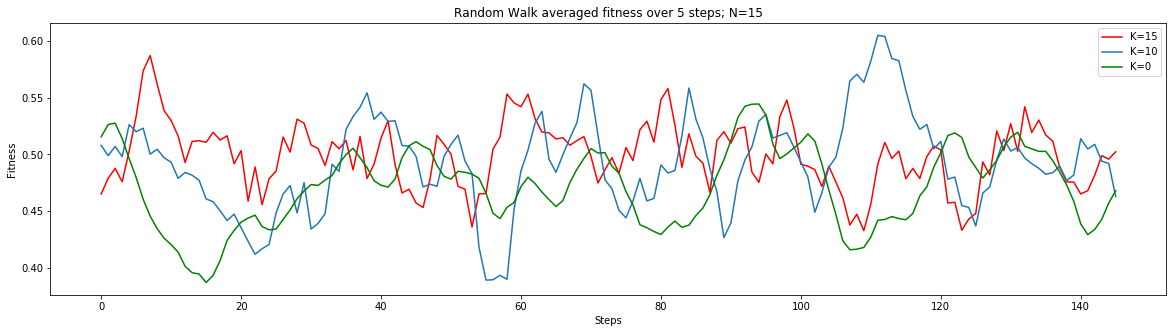

In [637]:
Num_Steps=150
FitnessPath_15 = random_walker(Num_Steps-1,N_15_K15_)
FitnessPath_10 = random_walker(Num_Steps-1,N_15_K10_)

FitnessPath_5 = random_walker(Num_Steps-1,N_15_K5_)
FitnessPath_0 = random_walker(Num_Steps-1,N_15_K0_)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(average_over_past_next_2(FitnessPath_15),'r-',label='K=15')
plt.plot(average_over_past_next_2(FitnessPath_10),label='K=10')

#plt.plot(average_over_past_next_2(FitnessPath_5),'b-',label='K=5')
plt.plot(average_over_past_next_2(FitnessPath_0),'g-',label='K=0')

#plt.plot(FitnessPath[0::],'go',label='Current Fitness')
plt.legend()
plt.title("Random Walk averaged fitness over 5 steps; N=15")
plt.xlabel('Steps')
plt.ylabel('Fitness')
plt.show()


So I tried using a up to 5 neighbors to average across, unfortuneatly the intution of a flat line did not really hold for high K, The intuition did make sense though, but its not readily visible.

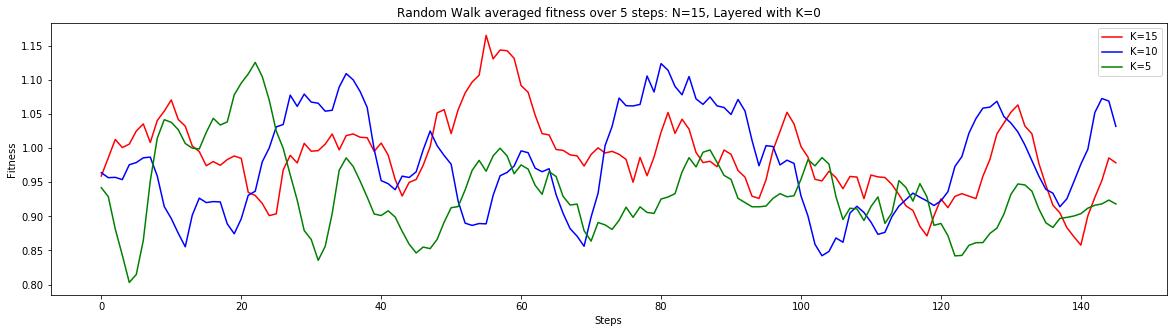

In [631]:
#layered
Num_Steps=150
FitnessPath_15 = random_walker(Num_Steps-1,Layer_Landscape_15_0)
FitnessPath_10 = random_walker(Num_Steps-1,Layer_Landscape_10_0)

FitnessPath_5 = random_walker(Num_Steps-1,Layer_Landscape_5_0)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(average_over_past_next_2(FitnessPath_15),'r-',label='K=15')
plt.plot(average_over_past_next_2(FitnessPath_10),'b-',label='K=10')
plt.plot(average_over_past_next_2(FitnessPath_5),'g-',label='K=5')

#plt.plot(FitnessPath[0::],'go',label='Current Fitness')
plt.legend()
plt.title("Random Walk averaged fitness over 5 steps: N=15, Layered with K=0")
plt.xlabel('Steps')
plt.ylabel('Fitness')
plt.show()


## Plot Autocorrelation

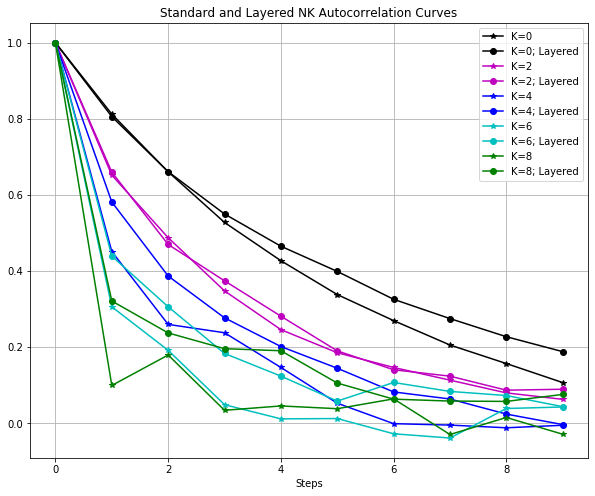

In [630]:
N = 10
numSteps=1000
plt.figure(figsize=(10,8))
for k in range(int(N/2)):
    NK_land = make_NK_land(N, k*2)
    K=k*2
    NK_land_0 = make_NK_land(N, 0)
    color='k'
    if k==1:
        color='m'
    if k==2:
        color='b'
    if k==3:
        color='c'
    if k==4:
        color='g'
    if k==5:
        color='p'
        
    
    FitnessPath = random_walker(numSteps,NK_land)
    AR_curve = Get_AR(FitnessPath,lag_range=N)
    plt.plot(AR_curve,color+'*-' ,label='K='+str(K))
    
    NK_land_layer = layer_landscapes(NK_land, NK_land_0, layering_mode="addition", weights=[0.5,0.5])
    FitnessPath = random_walker(numSteps,NK_land_layer)
    AR_curve = Get_AR(FitnessPath,lag_range=N)
    plt.plot(AR_curve,color+'o-' ,label='K='+str(K)+'; Layered')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')

plt.grid()
plt.title("Standard and Layered NK Autocorrelation Curves")
plt.show()



## Recreate table 1 of Herrmann et al.
 We get number of local optima, the clusters (recall a cluster is defined as inescapable from a two step jump), fo is global optima's size (fraction of optima),
 we see that a layered landscape is able to have many optima but few clusters with a notably large cluster containing the global optimum.

In [635]:
##Import packages and files
from itertools import compress, product
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator
import importlib
#import functions defining the layered landscape
from LayeredLandscapeFunctions import *
from Landscapes import *
import networkx as nx


##This functions takes as an input the string of file name params,e.g. "N-10_K1=3_K2=9_I=20"
#then loads in the mapping and generates the table one statistics we want:num_local_optima,num_clusters,fo_bar
def Get_Table_1_Stats(our_files,param_combo):
    loc_opt = []
    num_clusters= []
    fo_bars = []
    for file_name in our_files:
        
        if param_combo in file_name:
            try:
                df_transition = pd.read_csv(str(file_name.replace("_mapping","")))
                df_map = pd.read_csv(str(file_name))

                df_transition = df_transition.set_index('Unnamed: 0')#reset index

                Mat = Markov_Clustering(df_transition) #get markov cluster matrix
                MarkClusMatrix = nx.from_numpy_matrix(Mat) #convert to adjacency matrix undirected
                ##get the mapping and restrict it to maximas
                df_map_restricted = df_map[df_map.Maxima==1]

                #get the connected components/clusters
                G= nx.Graph(MarkClusMatrix)
                Components = list(nx.connected_components(G)) #list the components
                df_map_restricted['cluster']=0 #create variable and set to zero
                ##loop throught the components and assign clusters
                j=0 #number to index number of components
                NumComp = len(Components)
                for comp in Components:
                    for i in comp:
                        df_map_restricted['cluster'].iloc[i]=j
                    j+=1


                #identify cluster with the global maxima
                Cluster_of_Maxima = df_map_restricted.loc[df_map_restricted.Fitness.idxmax()].cluster
                ##set the table variables
                num_local_optima = len(df_map_restricted)
                num_clust = NumComp
                fo_bar = len(df_map_restricted[df_map_restricted.cluster ==Cluster_of_Maxima ]) / num_local_optima
                loc_opt.append(num_local_optima)
                num_clusters.append(num_clust)
                fo_bars.append(fo_bar)
            except:
                pass
            
    return [np.average(loc_opt),np.std(loc_opt),np.average(num_clusters),np.std(num_clusters),np.average(fo_bars),np.std(fo_bars)] 




    

import glob
import re
our_files = glob.glob("./Results_LON_Simulations/*mapping.csv")

all_files = []
for file in our_files:
    
    if re.findall("K1",file):
        all_files.extend(re.findall("K1=\d_K2=\d",file))
    else:
        all_files.extend(re.findall("K=\d",file))

List_file_params = set(all_files)

##Get a list of file names

##loop over them
Table_Stats = df_ = pd.DataFrame(index=List_file_params, columns=['AVG num_local_optima',"SD num_optima",'AVG num_clusters', "SD clusters",'AVG fo_bar',"SD fo_bar"])

for params in List_file_params:
    
    Table_Stats.loc[params] = Get_Table_1_Stats(our_files,params)




/Users/adrianapaza/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adrianapaza/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [636]:
Table_Stats

,AVG num_local_optima,SD num_optima,AVG num_clusters,SD clusters,AVG fo_bar,SD fo_bar
K=9,93.5,4.98052,9.55556,3.14858,0.297616,0.220256
K1=3_K2=9,62.1333,5.60793,6,2.78089,0.439496,0.279731
K=6,48.04,3.3043,6.44,2.0016,0.339895,0.233709
K=3,15.475,4.0987,4.45,1.88348,0.375659,0.282082


 We get number of local optima, the clusters (recall a cluster is defined as inescapable from a two step jump), fo is global optima's size (fraction of optima),
 we see that a layered landscape is able to have many optima but few clusters with a notably large cluster containing the global optimum.

## Copied discussion from 'Layered_landscapes_JA_analyses_and_comments' file
This discussion is copied because the simulations took a while to run to get these statistics, and needed N=8


The results are interesing. We can see, for example, in the first layered landscape (with K=8) that there are interesting properties not seen in the regular NK landscapes above. For one we notice the high path length/ distance (almost 6) between the global max and global minimum in the K=8 for second layer landscape - higher than any regular NK landscape except for K=0. We also see that there are a high number of local maxima - suggesting a rugged landscape. This suggests that there is clear seperation between the global max and minimum, but that getting there is hard as there are many local maxima along the way, especially near the global maxima. We notice that the 90th percentile of values tends to cluster within a path distancd of 2-2.7 steps from the global maxima (much less compared to unlayered high K landscapes).

This is a key benefit as the regular NK landscapes generated high numbers of local maxima with high K, but there was not clear seperation between maxima and minima. Indeed our Layered Landscapes are able to maintain some levesl of autocorrelation.

From these simulations we may further notice that the layered landscape differs from the singular landscape in that by layering the landscapes we are able to achieve a relatively large difference (normalized by standard deviation) between the global maxima and minima.

Future analysis can vary N, K, and the weights.
